# **PRiAD - projekt**

### Skład zepsołu:
* Daria Danieluk
* Kateryna Kononova
* Weronika Zbierowska

## Cel projektu
Projekt polega na wykonaniu analizy zbioru danych CIC-Darnket2020.

## Opis zbioru danych

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn import tree

In [7]:
# wczytanie i dopasowanie danych do wymagań projektowych
cols_list = ['Total Length of Fwd Packet', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Packet Length Min', 'Packet Length Max', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'Label', 'Label.1']
df = pd.read_csv('Darknet.CSV', usecols=cols_list) # ewentualnie ignorować błędy
df = df.loc[(df['Label'] == 'Tor') | (df['Label'] == 'Non-Tor')]
df.loc[df['Label.1'] == 'AUDIO-STREAMING', 'Label.1'] = 'Audio-Streaming'
df.loc[df['Label.1'] == 'File-transfer', 'Label.1'] = 'File-Transfer'
df.rename(columns={'Label': 'Network Category', 'Label.1': 'Traffic Category'}, inplace=True)
df.head()

,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count,Network Category,Traffic Category
0,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,Audio-Streaming
1,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,Audio-Streaming
2,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,Audio-Streaming
3,0,0,0,0,0,20,20,0,0,2,0,0,Non-Tor,Audio-Streaming
4,64530,1,0,0,0,11820,8000,0,498,1,0,0,Non-Tor,Audio-Streaming


In [121]:
print("Liczba wierszy = ", df.shape[0])
print("Liczba kolumn = ", df.shape[1])
df.info()

Liczba wierszy =  94748
Liczba kolumn =  14
<class 'pandas.core.frame.DataFrame'>
Int64Index: 94748 entries, 0 to 118610
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Total Length of Fwd Packet  94748 non-null  int64 
 1   Fwd PSH Flags               94748 non-null  int64 
 2   Bwd PSH Flags               94748 non-null  int64 
 3   Fwd URG Flags               94748 non-null  int64 
 4   Bwd URG Flags               94748 non-null  int64 
 5   Fwd Header Length           94748 non-null  int64 
 6   Bwd Header Length           94748 non-null  int64 
 7   Packet Length Min           94748 non-null  int64 
 8   Packet Length Max           94748 non-null  int64 
 9   FIN Flag Count              94748 non-null  int64 
 10  SYN Flag Count              94748 non-null  int64 
 11  RST Flag Count              94748 non-null  int64 
 12  Network Category            94748 non-null  object
 13  T

Wybrana część zbioru danych CIC-Darknet2020 składa się z 94748 wierszy i 14 kolumn - 12 atrybutów opisujących i 2 atrybutów decyzyjnych.

### *[tu wstawić opis kolumn]*

## Analiza ekploracyjna danych

### Braki w danych

In [6]:
print("Liczba brakujących danych = ", df.isnull().sum().sum())

Liczba brakujących danych =  0


W zbiorze nie występują żadne braki w danych.

### Podstawowe statystyki na temat atrybutów opisujących w zbiorze

In [7]:
df.describe()

,Total Length of Fwd Packet,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00,94748.00
mean,128545.44,0.12,0.00,0.00,0.00,2954.20,2605.25,7.75,333.98,0.60,0.63,0.03
std,2305132.74,0.33,0.00,0.00,0.00,38201.25,30052.28,17.22,580.15,0.57,0.93,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,60.00,0.00,0.00,0.00,0.00,40.00,20.00,0.00,52.00,1.00,0.00,0.00
75%,446.00,0.00,0.00,0.00,0.00,112.00,92.00,0.00,407.25,1.00,2.00,0.00
max,143491751.00,1.00,0.00,0.00,0.00,2279200.00,1632600.00,1350.00,33450.00,2.00,3.00,16.00


Zakresy wartości poszczególnych atrybutów:
* wartości atrybutu `Total Length of Fwd Packet` zmieniają się w bardzo dużym zakresie, od 0 do rzędu wielkości 10^8
* wartości atrybutów `Fwd Header Length` oraz `Bwd Header Length` zmieniają się w bardzo dużym zakresie, od 0 do rzędu wielkości 10^6
* wartości atrybutu `Packet Length Min` zmieniają się w dużym zakresie, od 0 do rzędu wielkości 10^3
* wartości atrybutu `Packet Length Max` zmieniają się w dużym zakresie, od 0 do rzędu wielkości 10^4
* wartości atrybutów `Bwd PSH Flags`, `Fwd URG Flags` oraz `Bwd URG Flags` są równe 0 dla wszystkich obiektów
* wartości atrybutu `Fwd PSH Flags` przyjmują wartości 0 lub 1
* wartości atrybutu `FIN Flag Count` przyjmują wartości 0, 1 lub 2
* wartości atrybutu `SYN Flag Count` przyjmują wartości 0, 1, 2 lub 3
* wartości atrybutu `RST Flag Count` zmieniają się w zakresie <0, 16>  
  
Jak można zauważyć, w zbiorze danych występują atrybuty o różnych zakresach zmienności, są niewspółmierne. Ich dokładny rozkład zostanie poddany analizie w dalszej części. Atrybuty `Bwd PSH Flags`, `Fwd URG Flags` oraz `Bwd URG Flags` zostaną wykluczone z dalszej analizy - nic do niej nie wnoszą.

In [8]:
df.drop(columns=['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94748 entries, 0 to 118610
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Total Length of Fwd Packet  94748 non-null  int64 
 1   Fwd PSH Flags               94748 non-null  int64 
 2   Fwd Header Length           94748 non-null  int64 
 3   Bwd Header Length           94748 non-null  int64 
 4   Packet Length Min           94748 non-null  int64 
 5   Packet Length Max           94748 non-null  int64 
 6   FIN Flag Count              94748 non-null  int64 
 7   SYN Flag Count              94748 non-null  int64 
 8   RST Flag Count              94748 non-null  int64 
 9   Network Category            94748 non-null  object
 10  Traffic Category            94748 non-null  object
dtypes: int64(9), object(2)
memory usage: 8.7+ MB


### Podstawowe statystyki na temat atrybutów opisujących - porównanie Tor vs Non-Tor

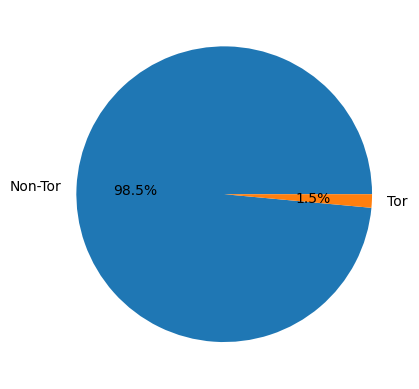

In [123]:
labels = ['Non-Tor', 'Tor']
sizes = [df[df['Network Category'] == 'Non-Tor'].shape[0], df[df['Network Category'] == 'Tor'].shape[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

Zbiór danych jest niezbalansowany - obiektów klasy `Non-Tor` jest znacznie więcej niż obiektów klasy `Tor`. Utrudnia to klasyfikacje oraz badanie histogramów, nie widać rozdzielenia na nich. 


In [10]:
print("Liczba obiektów w klasie Non-Tor = ", df[df['Network Category'] == 'Non-Tor'].shape[0])
df[df['Network Category'] == 'Non-Tor'].describe()

Liczba obiektów w klasie Non-Tor =  93356


,Total Length of Fwd Packet,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,93356.00,93356.00,93356.00,93356.00,93356.00,93356.00,93356.00,93356.00,93356.00
mean,37140.35,0.11,1117.06,1256.51,7.83,319.67,0.61,0.64,0.03
std,1087435.33,0.32,16709.23,19246.00,17.22,527.00,0.57,0.93,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,60.00,0.00,40.00,20.00,0.00,52.00,1.00,0.00,0.00
75%,409.00,0.00,112.00,92.00,0.00,328.00,1.00,2.00,0.00
max,80145974.00,1.00,1110420.00,1077432.00,1350.00,1460.00,2.00,2.00,16.00


In [11]:
print("Liczba obiektów w klasie Tor = ", df[df['Network Category'] == 'Tor'].shape[0])
df[df['Network Category'] == 'Tor'].describe()

Liczba obiektów w klasie Tor =  1392


,Total Length of Fwd Packet,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count
count,1392.00,1392.00,1392.00,1392.00,1392.00,1392.00,1392.00,1392.00,1392.00
mean,6258727.81,0.63,126163.99,93059.65,2.78,1293.51,0.11,0.08,0.01
std,15633456.03,0.48,255432.06,168366.54,17.00,1830.63,0.39,0.41,0.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1086.00,0.00,96.00,96.00,0.00,543.00,0.00,0.00,0.00
50%,103408.50,1.00,16290.00,39320.00,0.00,1460.00,0.00,0.00,0.00
75%,1705209.75,1.00,109505.00,94425.00,0.00,1460.00,0.00,0.00,0.00
max,143491751.00,1.00,2279200.00,1632600.00,191.00,33450.00,2.00,3.00,3.00


Obserwując jedynie zakresy wartości poszczególnych atrybutów opisujących można wyciągnąć następujące wnioski:
* obiekty o wartości atrybutu `Total Length of Fwd Packet` > 8.014597e+07 występują jedynie w klasie `Tor`
* atrybuty `Fwd PSH Flags` oraz `FIN Flag Count` nie umożliwiają odróżnienia obiektów klasy `Tor` od obiektów klasy `Non-Tor`
* obiekty o wartości atrybutu `Fwd Header Length` > 1.110420e+06 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `Bwd Header Length` > 1.077432e+06 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `Packet Length Min` > 191 występują jedynie w klasie `Non-Tor`
* obiekty o wartości atrybutu `Packet Length Max` > 1460 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `SYN Flag Count` > 2 występują jedynie w klasie `Tor`
* obiekty o wartości atrybutu `RST Flag Count` > 3 występują jedynie w klasie `Non-Tor`

### Porównanie częstości występowania flag TCP w klasach Tor i Non-Tor

In [9]:
df_flags_bin = df[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count']].astype(bool)
df_flags_bin['Network Category'] = df['Network Category']
df_flags_bin.groupby('Network Category').mean() * 100

,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,RST Flag Count
Network Category,,,,
Non-Tor,11.31,57.12,31.78,2.10
Tor,63.29,8.05,4.02,0.72


W powyższej tabeli przedstawiono procent obiektów w kategoriach `Tor` i `Non-Tor`, w których zostały ustawione poszczególne flagi TCP. Liczba poszczególnych flag dla danego obiektu nie została uwzględniona - brane pod uwagę było tylko wystąpienie flagi (>= 1) lub niewystąpienie flagi (= 0).  

* w klasie `Tor` największą częstość ma **flaga PSH**, co jest też największą wartością w całym porównaniu
* w klasie `Tor` najmniejszą częstość ma **flaga RST**, co jest też najmniejszą wartością w całym porównaniu
* w klasie `Non-Tor` największą częstość ma **flaga FIN**
* w klasie `Non-Tor` najmniejszą częstość ma **flaga RST**
* **flaga PSH** częściej występuje w klasie `Tor`
* **flagi FIN**, **SYN** i **RST** częściej występują w klasie `Non-Tor`
* są duże różnice pomiędzy częstością **flag PSH**, **FIN** i **SYN** pomiedzy dwoma klasami

### Analiza kategorii ruchu

In [12]:
print("Liczba kategorii ruchu = ", len(df.loc[:, 'Traffic Category'].unique()))

Liczba kategorii ruchu =  8


In [13]:
print("Liczba obiektów w danej klasie:")
for k in list(df.loc[:, 'Traffic Category'].unique()):
    print(k, " = ", df[df['Traffic Category'] == k].shape[0])

Liczba obiektów w danej klasie:
Audio-Streaming  =  1708
Browsing  =  32808
Chat  =  478
Email  =  505
File-Transfer  =  6847
P2P  =  48520
Video-Streaming  =  3584
VOIP  =  298


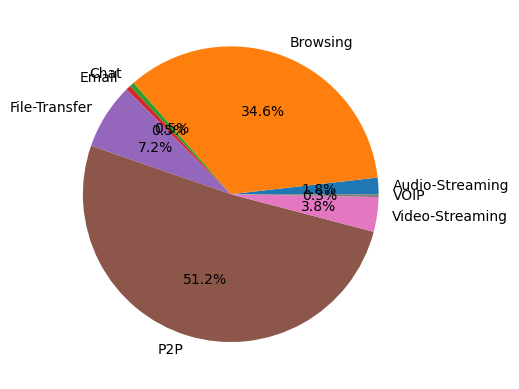

In [14]:
labels = []
sizes = []

for k in list(df.loc[:, 'Traffic Category'].unique()):
    labels.append(k)
    sizes.append(df[df['Traffic Category'] == k].shape[0])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

Liczba obiektów w poszczególnych kategoriach ruchu nie jest równa. Ponad połowa obiektów należy do kategorii `P2P`, a ponad 1/3 do kategorii `Browsing`. Jedynie 15% obiektów należy do pozostałych 6 kategorii.

Charakterystyka kategorii ruchu:
* **Browsing** - przeglądanie przez Firefox, Chrome
* **Audio-Streaming** - strumień audio: Vimeo, Youtube
* **VOIP** - telefonia internetowa, połączenia głosowe przez: Facebook, Skype and Hangouts
* **Video-Streaming** - strumień video: Vimeo, Youtube
* **P2P** - uTorrent i Transmission (BitTorrent)
* **File-Transfer** - przesyłanie plików: Skype,  Filezilla (SFTP, FTPS)
* **Email** - protokoły: SMTPS, POP3S, IMAPS
* **Chat** - ICQ, AIM, Skype, Facebook and Hangouts

### Porównanie częstości występowania flag TCP w różnych rodzajach ruchu

In [13]:
df_flags_traffic = df[['Fwd PSH Flags', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count']].astype(bool)
df_flags_traffic['Traffic Category'] = df['Traffic Category']
df_flags_traffic.groupby('Traffic Category').mean() * 100

,Fwd PSH Flags,FIN Flag Count,SYN Flag Count,RST Flag Count
Traffic Category,,,,
Audio-Streaming,28.40,28.69,13.58,0.94
Browsing,5.41,60.26,31.31,1.97
Chat,20.92,40.38,18.41,0.84
Email,15.45,46.14,23.76,6.53
File-Transfer,3.32,60.46,43.00,12.47
P2P,16.83,55.65,31.44,0.43
VOIP,64.77,14.09,5.03,2.35
Video-Streaming,11.69,43.61,22.24,5.58


W powyższej tabeli przedstawiono procent obiektów w każdej kategorii ruchu sieciowego, w których zostały ustawione poszczególne flagi TCP. Liczba poszczególnych flag dla danego obiektu nie została uwzględniona - brane pod uwagę było tylko wystąpienie flagi (>= 1) lub niewystąpienie flagi (= 0).  
* biorąc pod uwagę cały ruch, **flaga FIN** występuje najczęściej we wszystkich kategoriach oprócz `VOIP`
* biorąc pod uwagę cały ruch, **flaga RST** występuje najrzadziej ze wszystkich flag
* **flaga RST** najrzadziej występuje w klasach `P2P`, `Chat` i `Audio-Streaming`
* **flaga PSH** najczęściej występuje w klasie `VOIP`
* **flaga FIN** najczęściej występuje w klasach `Browsing` i `File-Transfer`
* **flaga SYN** najczęściej występuje w klasie `File-Transfer`
* **flaga RST** najczęściej występuje w klasie `File-Transfer`

### Rozkład wartości atrybutów opisujących w zbiorze danych

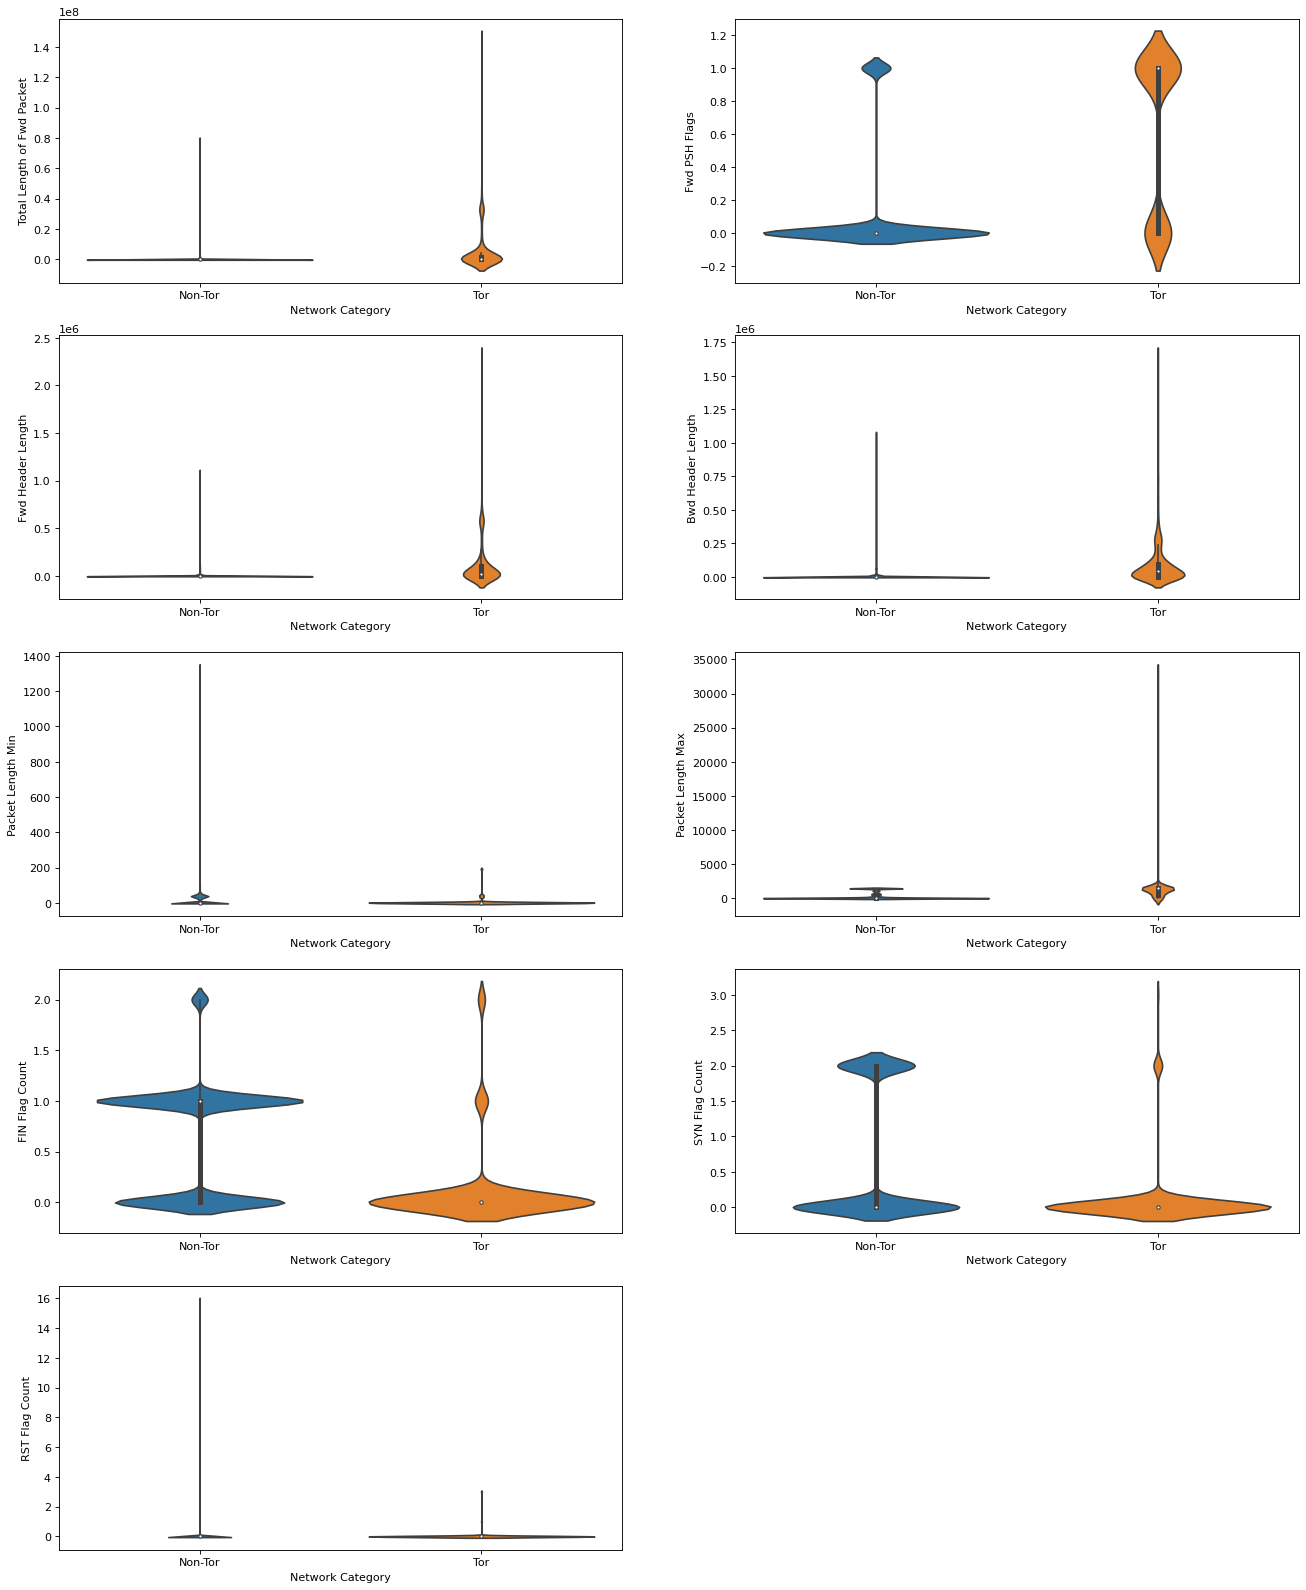

In [20]:
plt.figure(figsize=(20, 30), dpi=80)
nr = 1
for atr in df.columns[:-2]:
    plt.subplot(6, 2, nr)
    nr += 1
    sns.violinplot(data=df, x='Network Category', y=atr)

Obserwując zakresy wartości poszczególnych atrybutów opisujących można wyciągnąć następujące wnioski:
* obiekty o wartości atrybutu `Total Length of Fwd Packet` dla klas `Tor` i `Non-Tor` znajdują się w różnych zakresach
* obiekty o wartości atrybutu `Fwd PSH Flags` znajdują się w podobnych zakresach
* obiekty o wartości atrybutu `Fwd Header Length` i `Bwd Header Length` znajdują się w różnych zakresach
* wykresy skrzypcowe dla `Fwd Header Length` i `Bwd Header Length` są bardzo podobne do siebie
* obiekty o wartości atrybutu `Packet Length Min` znajdują się w różnych zakresach, największy zakres jest dla klasy `Non-Tor`, jednak dla obu klas przeważająca liczba obiektów się pokrywa w tych samych zakresach
* podobna sytuacja jest dla obiektów o wartości atrybutu `Packet Length Max`, ale największy zakres jest dla klasy `Tor`
* obiekty o wartości atrybutu `FIN Flag Count` dla klas `Tor` i `Non-Tor` znajdują się w różnych zakresach
* obiekty o wartości atrybutu `SYN Flag Count` dla klas `Tor` i `Non-Tor` znajdują się w różnych zakresach, jednak dla klasy `Tor` obiekty w górnej części zakresu mają małą częstotliowość
* obiekty o wartości atrybutu `RST Flag Count` dla klas `Tor` i `Non-Tor` znajdują się w różnych zakresach, jednak obszary o największej częstotliowści się pokrywają

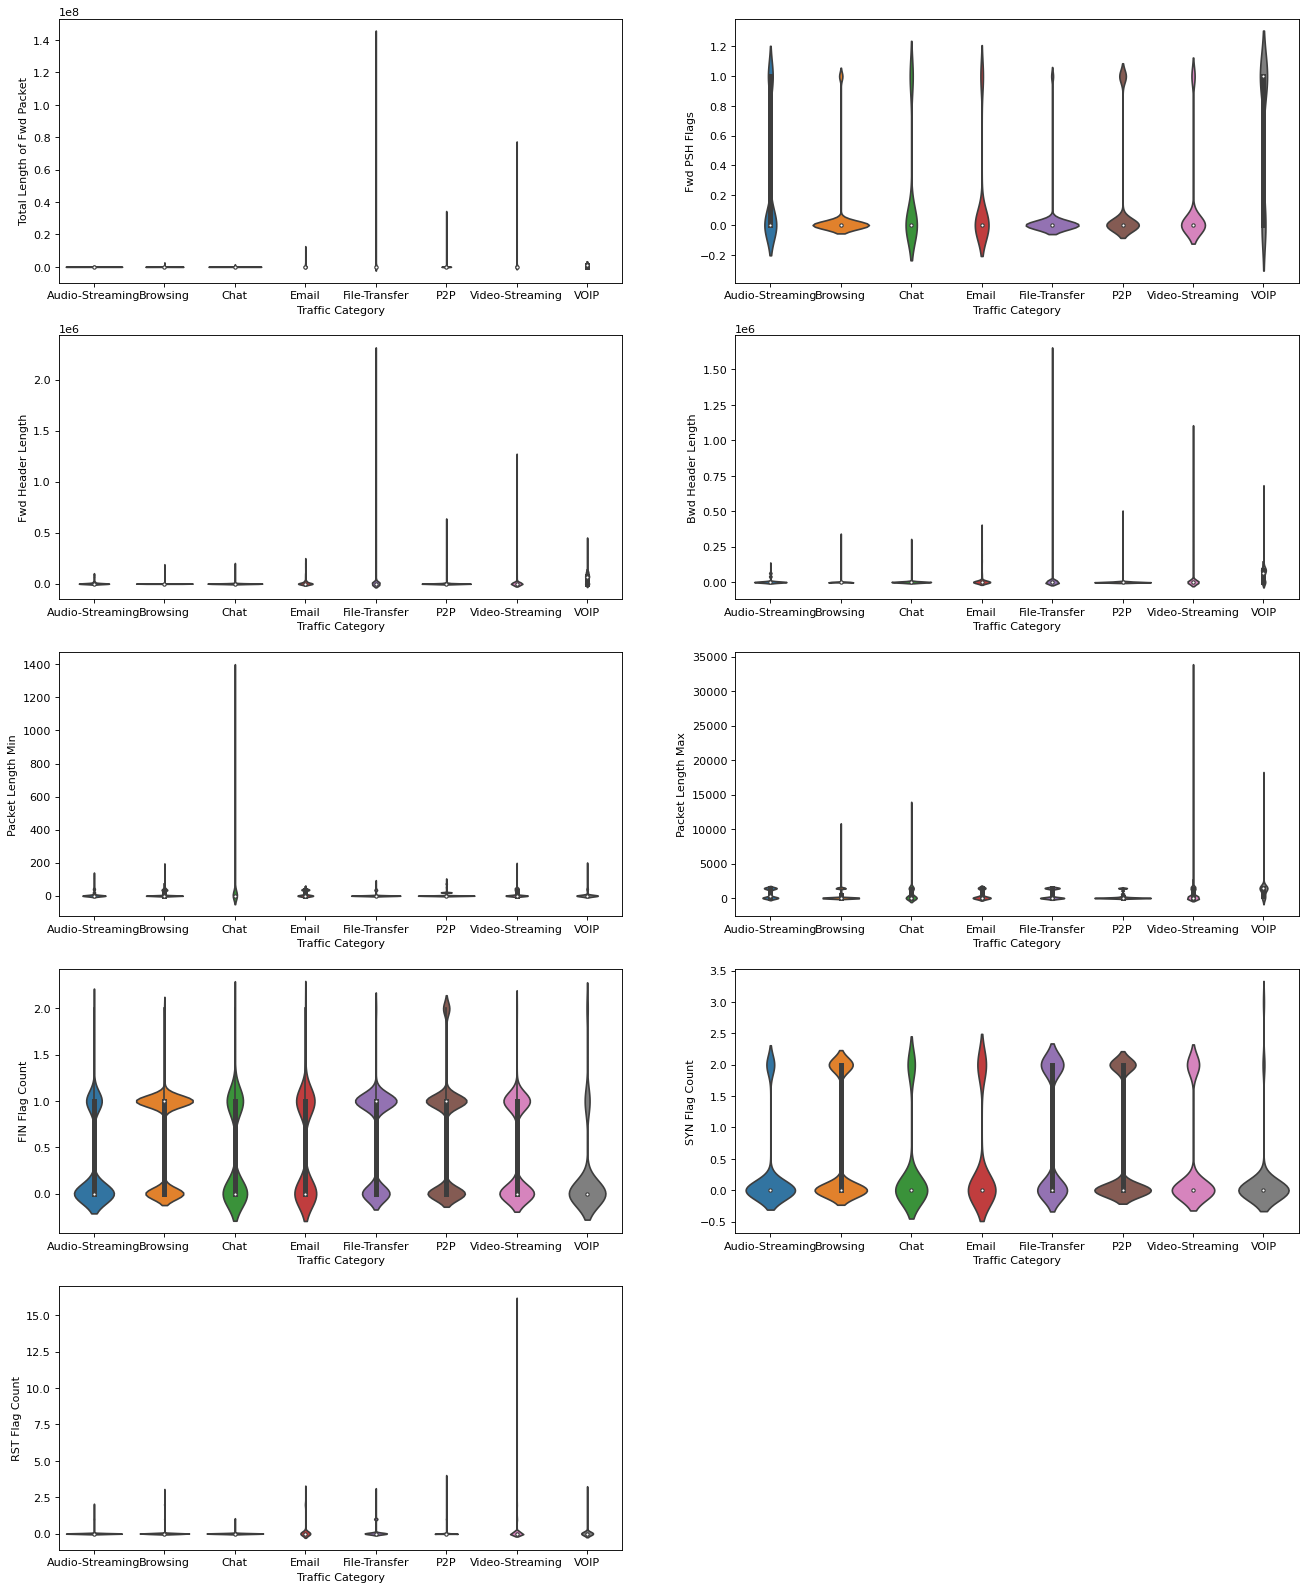

In [21]:
plt.figure(figsize=(20, 30), dpi=80)
nr = 1
for atr in df.columns[:-2]:
    plt.subplot(6, 2, nr)
    nr += 1
    sns.violinplot(data=df, x='Traffic Category', y=atr)

Obserwując zakresy wartości poszczególnych atrybutów opisujących można wyciągnąć następujące wnioski:
* atrybut `Total Length of Fwd Packet` pozwala na rozróżnienie niektórych obiektów klas `File-Transfer`, `P2P`, `Video-Streaming` i `Email` od pozostałych klas
* atrybut `Fwd Header Length` pozwala na rozróżnienie niektórych obiektów klas `File-Transfer`, `P2P`, `Video-Streaming` i `VOIP` od pozostałych klas
* atrybut `Bwd Header Length` pozwala na rozróżnienie niektórych obiektów klas `File-Transfer`, `Video-Streaming` i `VOIP` od pozostałych klas
* wszystkie obiekty mają takie same zakresy atrybutów `Fwd PSH Flags` i `FIN Flag Count`, więc nie pozwalają one na rozróżnienie klas
* * atrybut `Packet Length Min` pozwala na rozróżnienie niektórych obiektów klasy `Chat` od pozostałych klas
* atrybut `Packet Length Max` pozwala na rozróżnienie niektórych obiektów klas `Browsing`, `Chat`, `Video-Streaming` i `VOIP` od pozostałych klas
* atrybut `SYN Flag Count` pozwala na rozróżnienie niektórych obiektów klasy `VOIP` (`SYN Flag Count` = 3) od pozostałych klas
* atrybut `RST Flag Count` pozwala na rozróżnienie niektórych obiektów klasy `Video-Streaming` od pozostałych klas
* większość obiektów w zbiorze jest silnie skoncentrowana w dolnym zakresie zmienności atrybutów `Total Length of Fwd Packet`, `Fwd Header Length`, `Bwd Header Length`, `Packet Length Min`, `Packet Length Max` i `RST Flag Count` (wartości odstające rozciągają zakres zmienności w górę)
  
Jeżeli będziemy analizować wykresy osobno dla każdej klasy nie znajdziemy oczywistych atrybutów które pozowlą na rozróżnienie. Musimy analizować wszystkie klasy razem żeby wyciągnąc wnioski.

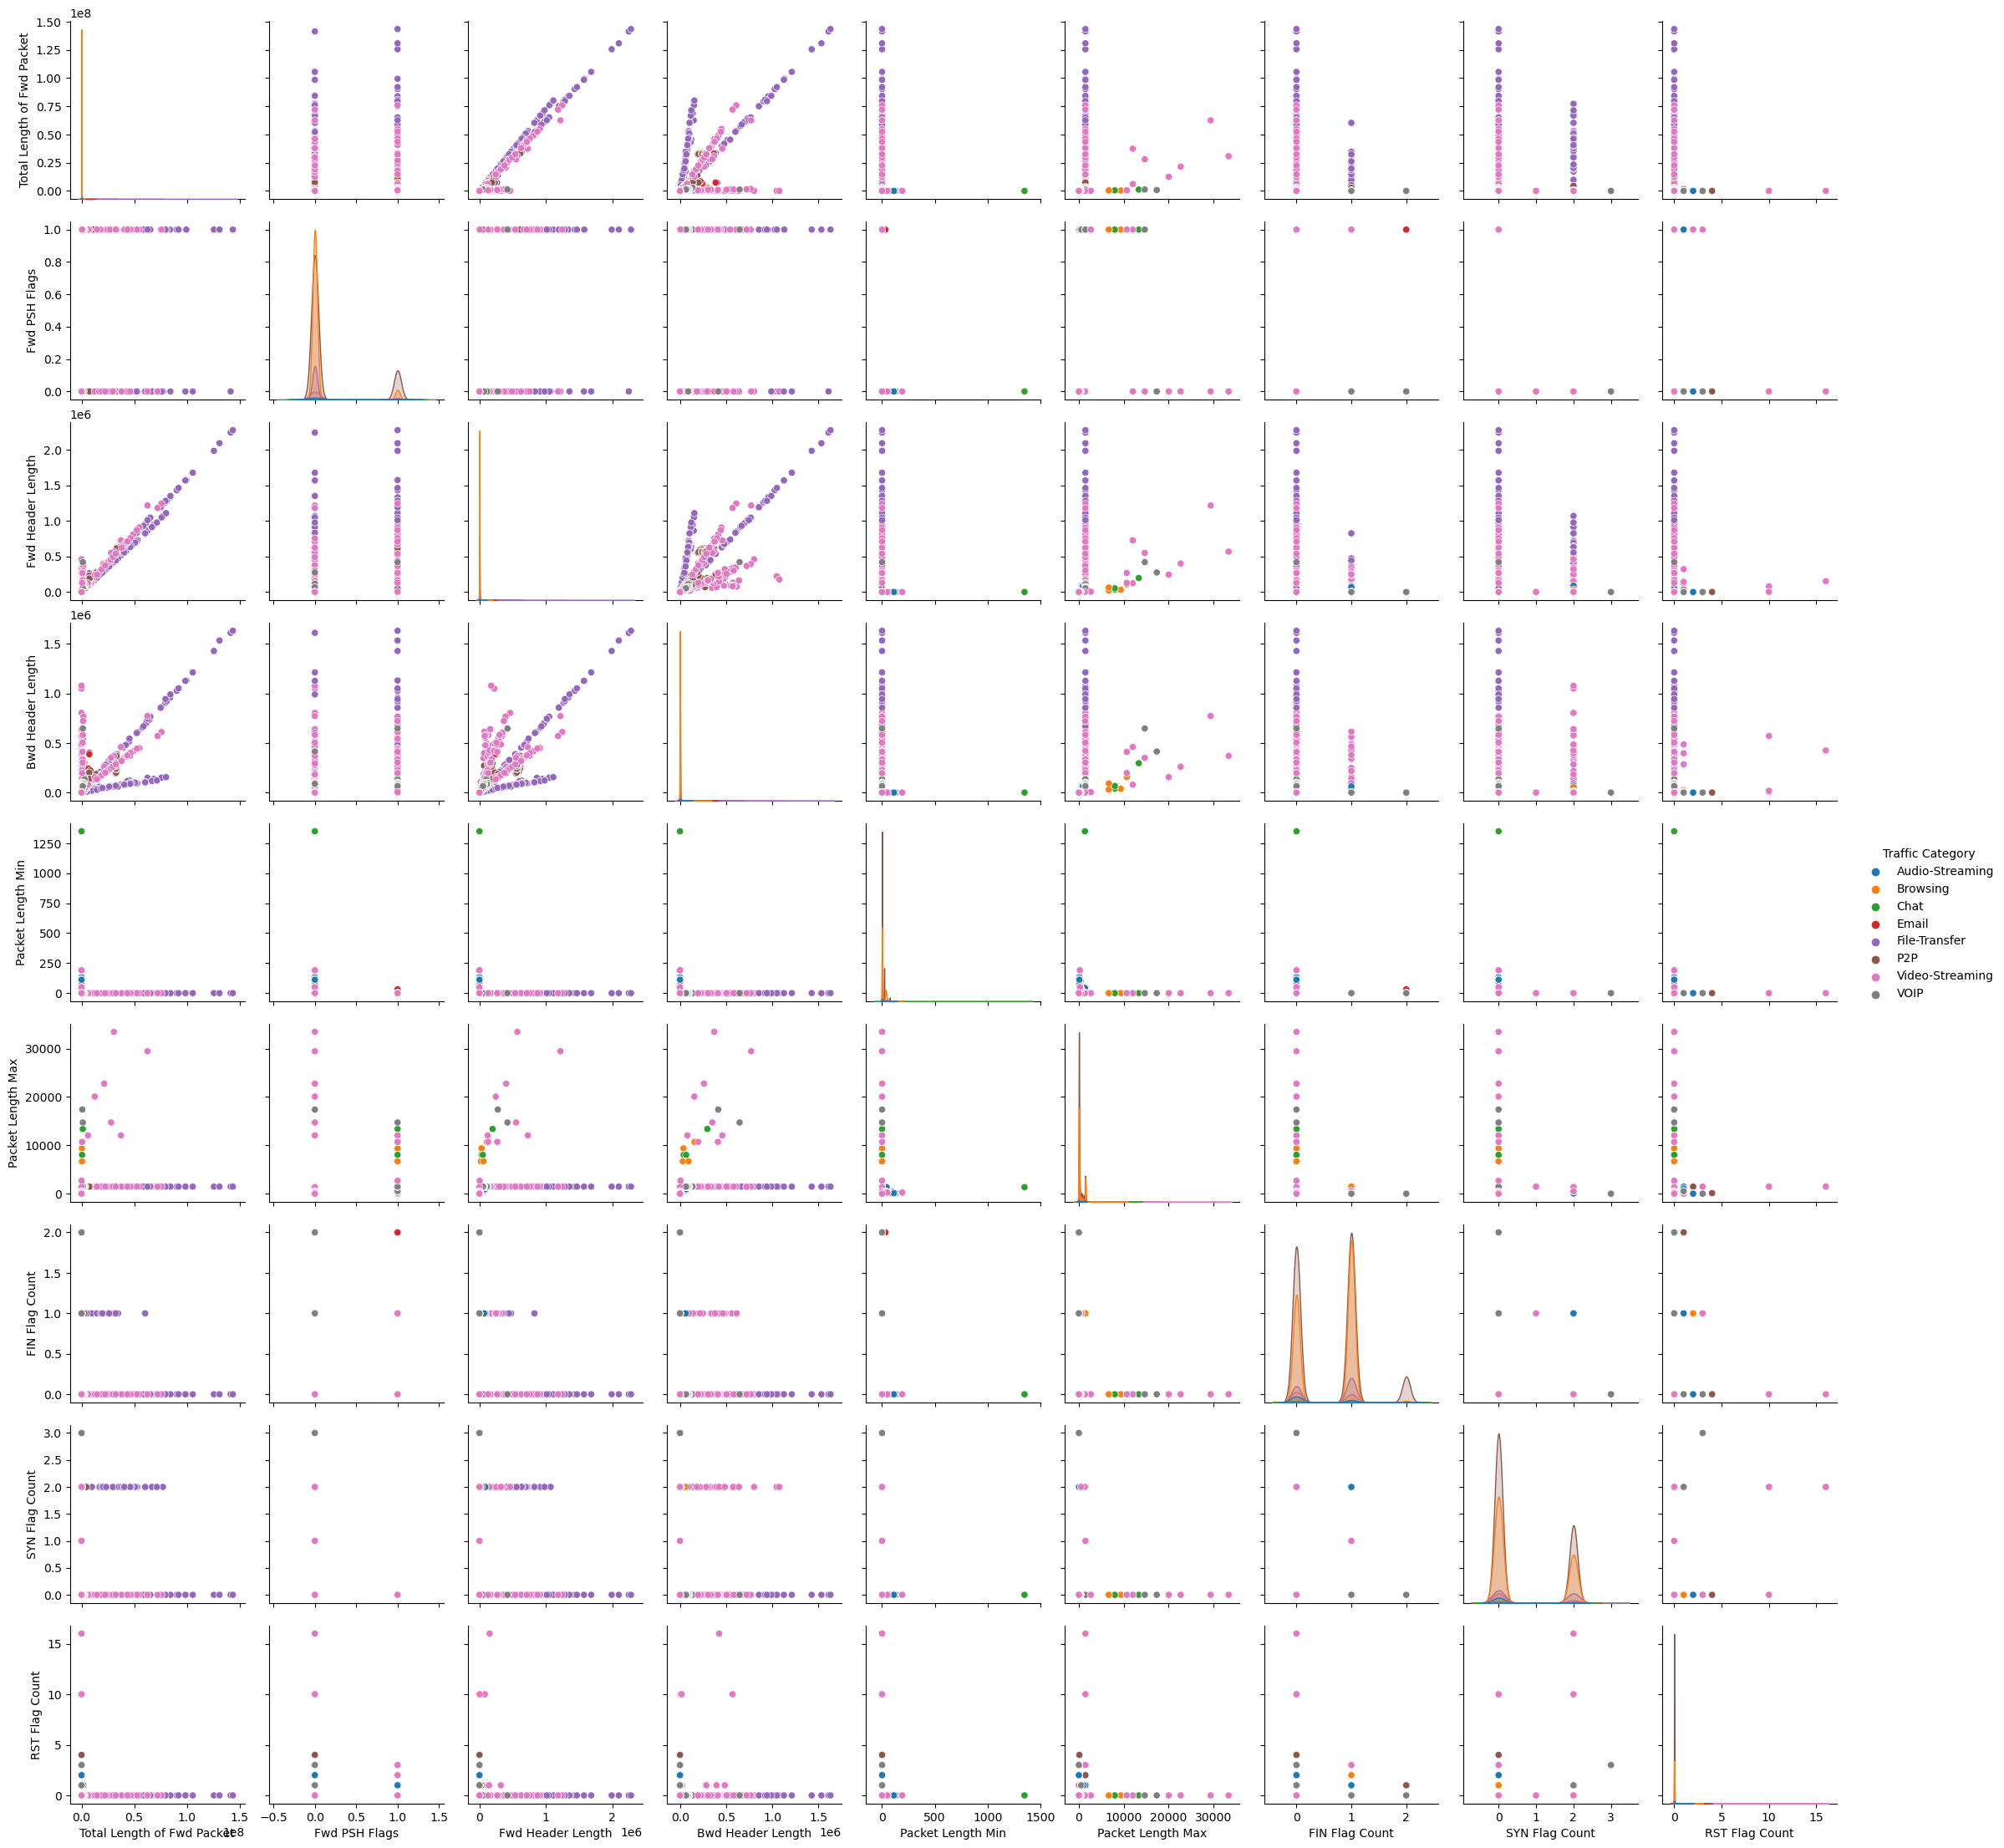

In [23]:
sns.pairplot(df, kind="scatter", hue="Traffic Category")
plt.show()

Można zauważyć korelację pomiędzy atrybutami `Total Length of Fwd Packet`, `Fwd Header Length` i `Bwd Header Length`. Zostanie to głębiej przeanalizowane poniżej za pomocą mapy ciepła i wykresów punktowych.

<AxesSubplot:>

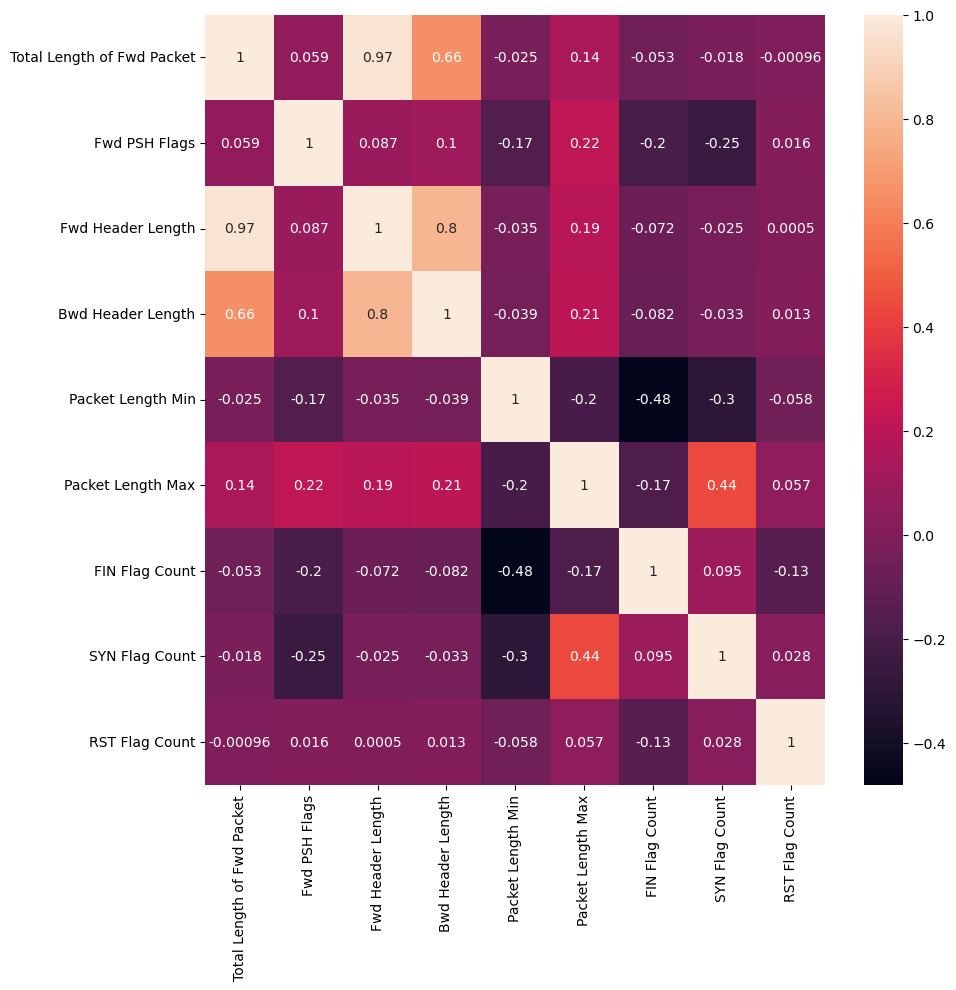

In [4]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(df.corr(), annot=df.corr())

Wnioski na temat korelacji atrybutów w zbiorze:
* współczynnik korelacji zmienia się w zakresie <-0.48, 0.97> (nie biorąc pod uwagę korelacji na przekątnej macierzy korelacji)
* `Fwd Header Length` i `Total Length of Fwd Packet` są bardzo silnie skorelowane dodatnio (współczynnik korelacji = 0.97)
* `Fwd Header Length` i `Bwd Header Length` są silnie skorelowane dodatnio (współczynnik korelacji = 0.8)
* `Bwd Header Length` i `Total Length of Fwd Packet` są średnio skorelowane dodatnio (współczynnik korelacji = 0.66)
* najmniej skorelowane są atrybuty `Total Length of Fwd Packet` i `RST Flag Count` (współczynnik korelacji = -0.00096)

Skorelowanie atrybutów 'Total Length of Fwd Packet' i 'Fwd Header Length'
współczynnik korelacji =  0.968655721686566


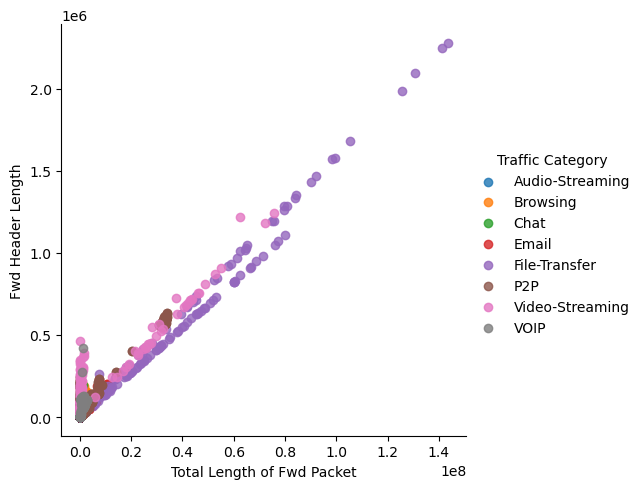

In [13]:
print("Skorelowanie atrybutów 'Total Length of Fwd Packet' i 'Fwd Header Length'")
print("współczynnik korelacji = ", df.corr().loc['Total Length of Fwd Packet']['Fwd Header Length'])
sns.lmplot(x='Total Length of Fwd Packet', y='Fwd Header Length', data=df, fit_reg=False, hue='Traffic Category', legend=True)

Skorelowanie atrybutów 'Bwd Header Length' i 'Fwd Header Length'
współczynnik korelacji =  0.7969474452147761


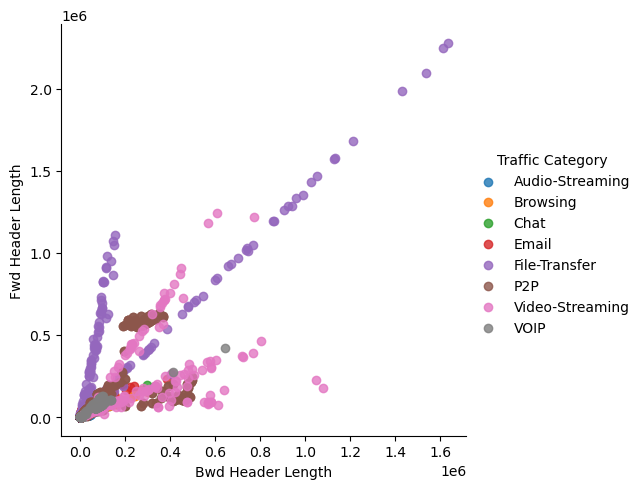

In [14]:
print("Skorelowanie atrybutów 'Bwd Header Length' i 'Fwd Header Length'")
print("współczynnik korelacji = ", df.corr().loc['Bwd Header Length']['Fwd Header Length'])
sns.lmplot(x='Bwd Header Length', y='Fwd Header Length', data=df, fit_reg=False, hue='Traffic Category', legend=True)

### Wybór atrybutów do klasyfikacji

Atrybuty nie brane pod uwagę w klasyfikacji:
* `Bwd PSH Flags`, `Fwd URG Flags` i `Bwd URG Flags`, ponieważ ich wartości są równe 0 dla wszystkich obiektów w zbiorze
* `Fwd PSH Flag` i `FIN Flag Count`, ponieważ mają identyczne zakresy zmienności
* `Fwd Header Length`, ponieważ jest silnie skorelowany z atrybutami `Total Length of Fwd Packet` i `Bwd Header Length`

Atrybuty wybrane do klasyfikacji:
* `Total Length of Fwd Packet`
* `Bwd Header Length`
* `Packet Length Min`
* `Packet Length Max`
* `SYN Flag Count`
* `RST Flag Count`

## Klasyfikacja binarna Tor vs Non-Tor

In [16]:
def podziel(df, proporcja):
    # dzieli macierz (ramkę) danych na zbiór uczacy i testowy
    # df - ramka danych; proporcja - proporcja podzialu (0-1)
    # zwraca słownik z kluczami:
    # opis_ucz/opis_test - macierz atrybutów opisujących zbioru uczącego/testowego
    # dec_ucz/dec_test - wektor wartosci atrybutu decyzyjnego zbioru uczącego/testowego
    # uwaga: atrybut decyzyjny jest zawsze na końcu (ostatnia kolumna ramki)
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

In [17]:
def weryfikuj(model, dane, atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:, atryb])
    mp = confusion_matrix(dane["dec_ucz"], wynik_ucz)
    # dokładność = sum(elem_na_przekatnej) / sum(wszystkie_elem)
    print("macierz pomyłek - zbiór uczący, dokładność:", np.sum(np.diag(mp)) / np.sum(mp))
    print(model.score(dane['opis_ucz'].iloc[:, atryb], dane['dec_ucz']))
    print(mp)
    mp = confusion_matrix(dane["dec_test"], wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:", np.sum(np.diag(mp)) / np.sum(mp))
    print(model.score(dane['opis_test'].iloc[:, atryb], dane['dec_test']))
    print(mp) 

In [18]:
def weryfikuj_bin(model, dane, atryb):
    # wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
    # dla zbioru uczącego i testowego
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje podziel)
    # atryb - lista atrybutów uwzględnianych w weryfikacji
    model.fit(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:, atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:, atryb])
    
    mp = confusion_matrix(dane["dec_ucz"], wynik_ucz)
    tn = mp[0][0]
    fn = mp[1][0]
    tp = mp[1][1]
    fp = mp[0][1]
    recall = tp / (tp + fn) # dobry tor / wszystkie tor
    specificity = tn / (tn + fp) # dobry non-tor / wszystkie non-tor
    fallout = 1 - specificity # ile non-tor uznało za tor (fałszywy alarm)
    precision = tp / (tp + fp) # prawadziwy tor / wszystkie które uznało za tor
    accuracy = (tp + tn) / (tp + tn + fp + fn) # wszystkie poprawnie sklsyfikowane / wszystkie obiekty
    
    print("ZBIÓR UCZĄCY")
    print("\tczułość (recall): ", recall)
    print("\tspecyficzność (specificity): ", specificity)
    print("\tfall-out: ", fallout)
    print("\tprecyzja (precision): ", precision)
    print("\tdokładność (accuracy): ", accuracy)
    print("macierz pomyłek - zbiór uczący")
    print(mp)
    
    mp = confusion_matrix(dane["dec_test"], wynik_test)
    tn = mp[0][0]
    fn = mp[1][0]
    tp = mp[1][1]
    fp = mp[0][1]
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fallout = 1 - specificity
    precision = tp / (tp + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    print("\nZBIÓR TESTOWY")
    print("\tczułość (recall): ", recall)
    print("\tspecyficzność (specificity): ", specificity)
    print("\tfall-out: ", fallout)
    print("\tprecyzja (precision): ", precision)
    print("\tdokładność (accuracy): ", accuracy)
    print("macierz pomyłek - zbiór testowy")
    print(mp) 

Zostanie przeprowadzona klasyfikacja binarna zbioru na 2 klasy (Tor lub Non-Tor) według atrybutu decyzyjnego `Network Category`. Atrybut decyzyjny `Traffic Category` nie zostanie w niej uwzględniony. Do klasyfikacji zostaną użyte 2 klasyfikatory. Zbiór danych zostanie podzielony na uczący (70% zbioru) i testowy (30% zbioru).

In [19]:
df_bin = df.drop(columns=['Traffic Category'])
df_bin.head()

,Total Length of Fwd Packet,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Packet Length Min,Packet Length Max,FIN Flag Count,SYN Flag Count,RST Flag Count,Network Category
0,0,0,20,20,0,0,2,0,0,Non-Tor
1,0,0,20,20,0,0,2,0,0,Non-Tor
2,0,0,20,20,0,0,2,0,0,Non-Tor
3,0,0,20,20,0,0,2,0,0,Non-Tor
4,64530,1,11820,8000,0,498,1,0,0,Non-Tor


In [20]:
data = podziel(df_bin, 0.3)
print('Liczba obiektów zbioru uczącego: ', len(data["opis_ucz"]))
print('Liczba obiektów zbioru testowego: ', len(data["opis_test"]))

Liczba obiektów zbioru uczącego:  66323
Liczba obiektów zbioru testowego:  28425


In [23]:
# 1-NN + wszystkie atrybuty bez 'Fwd PSH Flags', 'FIN Flag Count', i 'Bwd Header Length'
model = KNeighborsClassifier(n_neighbors=1)
weryfikuj_bin(model, data, [0, 3, 4, 5, 7, 8])

D:\dirto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\dirto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

ZBIÓR UCZĄCY
	czułość (recall):  0.9365708622398414
	specyficzność (specificity):  1.0
	fall-out:  0.0
	precyzja (precision):  1.0
	dokładność (accuracy):  0.9990350255567451
macierz pomyłek - zbiór uczący
[[65314     0]
 [   64   945]]

ZBIÓR TESTOWY
	czułość (recall):  0.7180156657963447
	specyficzność (specificity):  0.9973967619998574
	fall-out:  0.002603238000142616
	precyzja (precision):  0.7902298850574713
	dokładność (accuracy):  0.99363236587511
macierz pomyłek - zbiór testowy
[[27969    73]
 [  108   275]]


In [24]:
# 5-NN + wszystkie atrybuty bez 'Fwd PSH Flags', 'FIN Flag Count', i 'Bwd Header Length'
# może uruchomić dla różnej liczby sąsiadów i porównać błędy
model = KNeighborsClassifier(n_neighbors=5)
weryfikuj_bin(model, data, [0, 3, 4, 5, 7, 8])

D:\dirto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\dirto\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True o

ZBIÓR UCZĄCY
	czułość (recall):  0.7601585728444004
	specyficzność (specificity):  0.9988363903604128
	fall-out:  0.001163609639587171
	precyzja (precision):  0.9098457888493475
	dokładność (accuracy):  0.9952052832350768
macierz pomyłek - zbiór uczący
[[65238    76]
 [  242   767]]

ZBIÓR TESTOWY
	czułość (recall):  0.6449086161879896
	specyficzność (specificity):  0.9980029955067399
	fall-out:  0.001997004493260124
	precyzja (precision):  0.8151815181518152
	dokładność (accuracy):  0.993245382585752
macierz pomyłek - zbiór testowy
[[27986    56]
 [  136   247]]


In [25]:
# NearestCentroid + wszystkie atrybuty bez 'Fwd PSH Flags', 'FIN Flag Count', i 'Bwd Header Length'
model = NearestCentroid()
weryfikuj_bin(model, data, [0, 3, 4, 5, 7, 8])

ZBIÓR UCZĄCY
	czułość (recall):  0.21902874132804756
	specyficzność (specificity):  0.9988517010135652
	fall-out:  0.0011482989864347593
	precyzja (precision):  0.7466216216216216
	dokładność (accuracy):  0.9869879227417336
macierz pomyłek - zbiór uczący
[[65239    75]
 [  788   221]]

ZBIÓR TESTOWY
	czułość (recall):  0.21671018276762402
	specyficzność (specificity):  0.9987518721917125
	fall-out:  0.0012481278082875358
	precyzja (precision):  0.7033898305084746
	dokładność (accuracy):  0.9882145998240985
macierz pomyłek - zbiór testowy
[[28007    35]
 [  300    83]]


In [26]:
# Gauss + wszystkie atrybuty bez 'Fwd PSH Flags', 'FIN Flag Count', i 'Bwd Header Length'
model = GaussianNB()
weryfikuj_bin(model, data, [0, 3, 4, 5, 7, 8])

ZBIÓR UCZĄCY
	czułość (recall):  0.3726461843409316
	specyficzność (specificity):  0.9967082095722204
	fall-out:  0.003291790427779606
	precyzja (precision):  0.6362098138747885
	dokładność (accuracy):  0.9872140886268715
macierz pomyłek - zbiór uczący
[[65099   215]
 [  633   376]]

ZBIÓR TESTOWY
	czułość (recall):  0.34203655352480417
	specyficzność (specificity):  0.9962556165751373
	fall-out:  0.0037443834248627184
	precyzja (precision):  0.5550847457627118
	dokładność (accuracy):  0.9874406332453826
macierz pomyłek - zbiór testowy
[[27937   105]
 [  252   131]]


In [29]:
# drzewo decyzyjne + wszystkie atrybuty bez 'Fwd PSH Flags', 'FIN Flag Count', i 'Bwd Header Length'
# może zrobić porównanie wyników dla różnych głębokości drzewa z wykresem błędów
for g in range(2, 21):
    model = tree.DecisionTreeClassifier(max_depth=g)
    print("drzewo o głębokości " + str(g))
    weryfikuj_bin(model, data, [0, 3, 4, 5, 7, 8])
    print("\n")

drzewo o głębokości 2
ZBIÓR UCZĄCY
	czułość (recall):  0.55599603567889
	specyficzność (specificity):  0.9971522185136418
	fall-out:  0.002847781486358225
	precyzja (precision):  0.751004016064257
	dokładność (accuracy):  0.9904407219215053
macierz pomyłek - zbiór uczący
[[65128   186]
 [  448   561]]

ZBIÓR TESTOWY
	czułość (recall):  0.5195822454308094
	specyficzność (specificity):  0.9971471364381999
	fall-out:  0.0028528635618001452
	precyzja (precision):  0.7132616487455197
	dokładność (accuracy):  0.9907124010554089
macierz pomyłek - zbiór testowy
[[27962    80]
 [  184   199]]


drzewo o głębokości 3
ZBIÓR UCZĄCY
	czułość (recall):  0.5629335976214074
	specyficzność (specificity):  0.9982392748874667
	fall-out:  0.0017607251125333345
	precyzja (precision):  0.8316251830161054
	dokładność (accuracy):  0.9916167845242224
macierz pomyłek - zbiór uczący
[[65199   115]
 [  441   568]]

ZBIÓR TESTOWY
	czułość (recall):  0.5195822454308094
	specyficzność (specificity):  0.9982526210683

ZBIÓR UCZĄCY
	czułość (recall):  0.9266600594648167
	specyficzność (specificity):  0.9999540680405427
	fall-out:  4.593195945734596e-05
	precyzja (precision):  0.9968017057569296
	dokładność (accuracy):  0.9988390151229588
macierz pomyłek - zbiór uczący
[[65311     3]
 [   74   935]]

ZBIÓR TESTOWY
	czułość (recall):  0.814621409921671
	specyficzność (specificity):  0.9985735682190999
	fall-out:  0.0014264317809000726
	precyzja (precision):  0.8863636363636364
	dokładność (accuracy):  0.9960949868073878
macierz pomyłek - zbiór testowy
[[28002    40]
 [   71   312]]


drzewo o głębokości 17
ZBIÓR UCZĄCY
	czułość (recall):  0.933597621407334
	specyficzność (specificity):  0.9999693786936951
	fall-out:  3.0621306304934315e-05
	precyzja (precision):  0.9978813559322034
	dokładność (accuracy):  0.9989596369283658
macierz pomyłek - zbiór uczący
[[65312     2]
 [   67   942]]

ZBIÓR TESTOWY
	czułość (recall):  0.8067885117493473
	specyficzność (specificity):  0.9984665858355324
	fall-out:  0.

Wnioski:

Można by było wybrać zbiór Non-Tor o takiej samej wartości jak Tor, jednak nie będzie on odpowiedni do klasyfikacji, ponieważ pomiemy wiele atrybutów.